In [1]:
import madina as md
import madina.una.tools as una
import multiprocessing

In [2]:
Bancho = md.Zonal()

In [ ]:
Bancho.load_layer("Buildings",r"C:\Users\86135\OneDrive - Georgia Institute of Technology\桌面\上完的课程\Tokyo Studio\Bancho\Madina_Bancho\Bancho_origin.geojson")
Bancho.load_layer("Sidewalk",r"C:\Users\86135\OneDrive - Georgia Institute of Technology\桌面\上完的课程\Tokyo Studio\Bancho\Madina_Bancho\Pedestrian_Rds.geojson")
Bancho.load_layer("Park",r"C:\Users\86135\OneDrive - Georgia Institute of Technology\桌面\上完的课程\Tokyo Studio\Bancho\Madina_Bancho\park.geojson")

In [4]:
Bancho.describe()

Layer name           | Visible | projection | rows  | File path           
Buildings            |       1 | EPSG:32654 |  1280 | C:\Users\86135\OneDrive - Georgia Institute of Technology\桌面\上完的课程\Tokyo Studio\Bancho\Madina_Bancho\Bancho_origin.geojson
Sidewalk             |       1 | EPSG:32654 | 26239 | C:\Users\86135\OneDrive - Georgia Institute of Technology\桌面\work\客户\客户2\revise.geojson
Park                 |       1 | EPSG:32654 |    70 | C:\Users\86135\OneDrive - Georgia Institute of Technology\桌面\上完的课程\Tokyo Studio\Bancho\Madina_Bancho\park.geojson
Geographic center: (139.7395280012337, 35.68861437819869)
No network graph yet. First, insert a layer that contains network segments (streets, sidewalks, ..) and call create_street_network(layer_name,  weight_attribute=None)
	Then,  insert origins and destinations using 'insert_nodes(label, layer_name, weight_attribute)'
	Finally, when done, create a network by calling 'create_street_network()'


In [ ]:
Bancho.create_street_network("Sidewalk", node_snapping_tolerance=0.1, weight_attribute=)
Bancho.insert_node(label='origin', layer_name="Buildings",weight_attribute="resident")
Bancho.insert_node(label='destination', layer_name="Park")

SyntaxError: expected argument value expression (1062887220.py, line 1)

: 

In [6]:
Bancho.create_graph()

In [7]:
search_radii = [400, 800, 1200]

for i in search_radii:
    una.accessibility(Bancho, search_radius=i, 
                  save_reach_as= f"reach_to_Park_{i}",
                  beta= 0.001,
                  knn_weights=[0.5,0.25,0.25],
                  num_cores= 32)
    
    df = Bancho["Buildings"].gdf
    print(df[f'reach_to_Park_{i}'].describe())
    print(f"Completed accessibility for radius: {i}m")

count    1280.000000 1,280 of 1,280 origins (100.00%)]
mean        3.002344
std         3.210250
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        13.000000
Name: reach_to_Park_400, dtype: float64
Completed accessibility for radius: 400m
count    1280.000000 1,280 of 1,280 origins (100.00%)]
mean       17.170313
std         3.782689
min         6.000000
25%        15.000000
50%        18.000000
75%        20.000000
max        25.000000
Name: reach_to_Park_800, dtype: float64
Completed accessibility for radius: 800m
count    1280.000000 1,280 of 1,280 origins (100.00%)]
mean       36.239063
std         5.336001
min        23.000000
25%        33.000000
50%        37.000000
75%        40.000000
max        47.000000
Name: reach_to_Park_1200, dtype: float64
Completed accessibility for radius: 1200m


In [8]:
import matplotlib.pyplot as plt

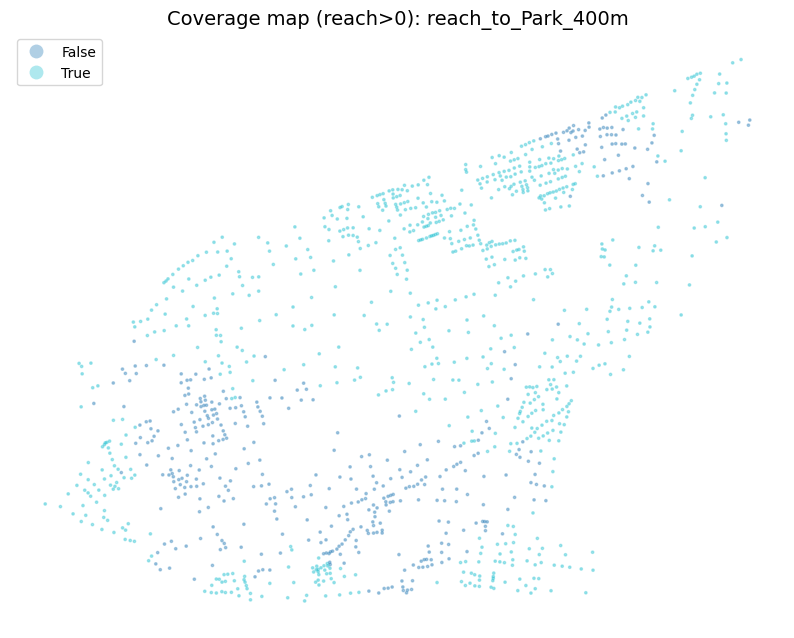

Coverage rate (reach>0) for reach_to_Park_400: 66.25%


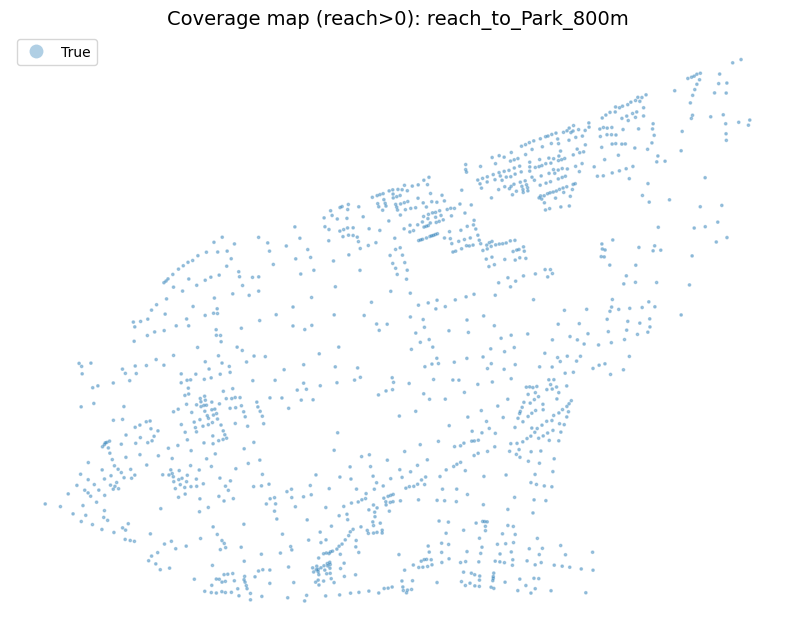

Coverage rate (reach>0) for reach_to_Park_800: 100.00%


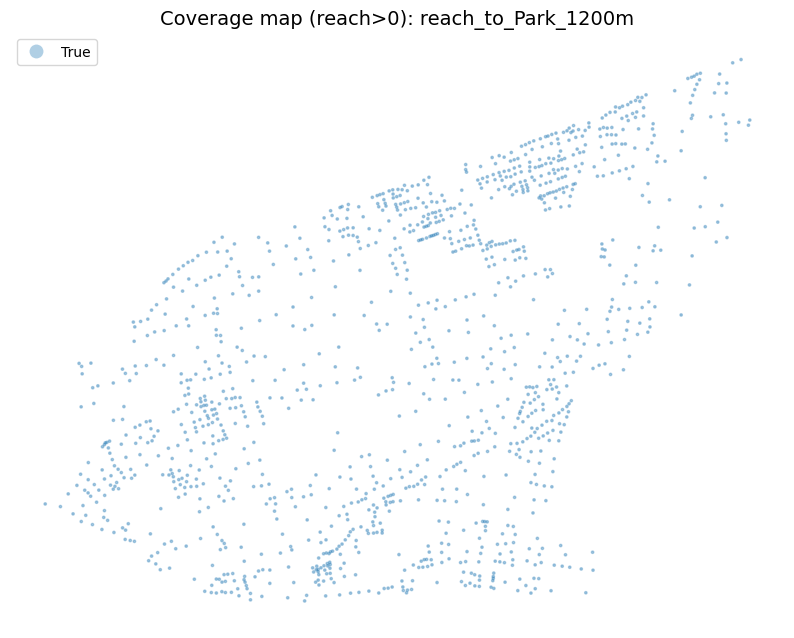

Coverage rate (reach>0) for reach_to_Park_1200: 100.00%


In [9]:
for i in [400, 800, 1200]:
    col = f"reach_to_Park_{i}"
    df[f'cover_{i}'] = (df[col]>0)
    fig, ax = plt.subplots(figsize=(10, 8))
    df.plot(column=f'cover_{i}',
          markersize=3,
          ax = ax,
          categorical=True,
          legend=True,
          alpha=0.35,
          )
    ax.set_title(f"Coverage map (reach>0): {col}m", fontsize=14)
    ax.axis("off")
    plt.show()
    plt.close(fig)
    coverage_rate = df[f'cover_{i}'].mean()
    print(f"Coverage rate (reach>0) for {col}: {coverage_rate:.2%}")

In [10]:
df

,OBJECTID,OBJECTID_1,OBJECTID_12,OBJECTID_12_13,OBJECTID_12_13_14,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,osm_id,...,pop_each_building,pop_each_building_int,pop_adj,geometry,reach_to_Park_400,reach_to_Park_800,reach_to_Park_1200,cover_400,cover_800,cover_1200
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,2,2,12,1,12,1,12,132804462,...,20.085825,20,36,POINT (386130.794 3950169.648),4.0,16.0,39.0,True,True,True
1,2,2,3,3,13,1,13,1,13,132804554,...,14.233026,14,25,POINT (386114.833 3950152.829),1.0,15.0,39.0,True,True,True
2,3,3,4,4,14,1,14,1,14,132804555,...,23.049485,23,42,POINT (386055.275 3950141.967),4.0,17.0,42.0,True,True,True
3,4,4,5,5,15,1,15,1,15,132804556,...,12.248223,12,22,POINT (386081.352 3950149.894),4.0,16.0,40.0,True,True,True
4,5,5,6,6,16,1,16,1,16,133039957,...,7.089927,7,13,POINT (386179.507 3950172.379),1.0,14.0,39.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1276,1293,1860,1860,4765,1,4861,1,4765,1427996762,...,4.942589,5,9,POINT (386612.663 3950654.686),5.0,13.0,44.0,True,True,True
1276,1277,1294,1861,1861,4766,1,4862,1,4766,1427996763,...,7.027220,7,13,POINT (386617.711 3950636.124),5.0,14.0,44.0,True,True,True
1277,1278,1295,1862,1862,4767,1,4863,1,4767,1427996764,...,6.365011,6,11,POINT (386620.14 3950720.466),5.0,12.0,45.0,True,True,True


In [11]:
df.to_file('Reach_to_Park_Bancho.geojson', driver='GeoJSON')